In [280]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [281]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [282]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [283]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [284]:
df.describe(include='all')

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.947075,68533.259749,NaN,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,NaN,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000


In [285]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [286]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [287]:
df.drop_duplicates(keep = 'first')

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [288]:
#find numeric column
num_col = [i for i in df.columns if df[i].dtypes!='O']
num_col

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

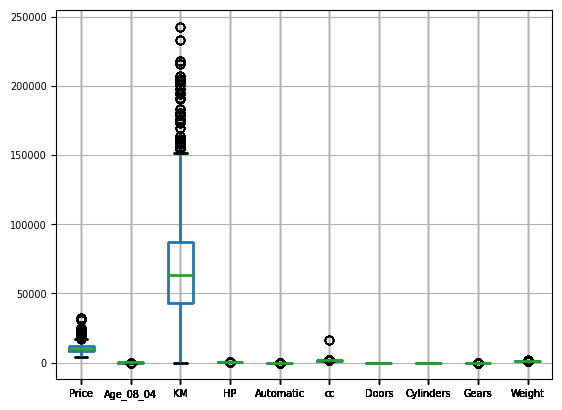

In [289]:
##find outliers of numeric column
import matplotlib.pyplot as plt
for i in num_col:
    df.boxplot(column = num_col, fontsize = 7)

plt.show()

In [290]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Price         3500.00
Age_08_04       26.00
KM           44020.75
HP              20.00
Automatic        0.00
cc             200.00
Doors            2.00
Cylinders        0.00
Gears            0.00
Weight          45.00
dtype: float64

In [291]:
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR

In [292]:
df_cleaned = df[~((df < LB) | (df > UB)).any(axis=1)]

In [293]:
df_cleaned

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
18,16750,24,25563,Petrol,110,0,1600,3,4,5,1065
19,16950,30,64359,Petrol,110,0,1600,3,4,5,1105
20,15950,30,67660,Petrol,110,0,1600,3,4,5,1105
22,15950,28,56349,Petrol,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [294]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lab_enc = LabelEncoder()

In [295]:
df_cleaned['Fuel_Type']= lab_enc.fit_transform(df_cleaned[['Fuel_Type']])
import warnings
warnings.filterwarnings('ignore')

In [296]:
df_cleaned

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,12950,23,71138,1,69,0,1900,3,4,5,1105
18,16750,24,25563,2,110,0,1600,3,4,5,1065
19,16950,30,64359,2,110,0,1600,3,4,5,1105
20,15950,30,67660,2,110,0,1600,3,4,5,1105
22,15950,28,56349,2,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [297]:
df_cleaned.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.867168,-0.531257,-0.021329,0.111864,NaN,0.109523,0.178103,NaN,NaN,0.472660
Age_08_04,-0.867168,1.000000,0.468104,0.101718,0.011544,NaN,-0.066002,-0.102536,NaN,NaN,-0.388867
KM,-0.531257,0.468104,1.000000,-0.246730,-0.046861,NaN,0.142423,0.010608,NaN,NaN,-0.030156
Fuel_Type,-0.021329,0.101718,-0.246730,1.000000,0.213883,NaN,-0.296736,-0.044889,NaN,NaN,-0.336780
HP,0.111864,0.011544,-0.046861,0.213883,1.000000,NaN,0.592455,0.170784,NaN,NaN,0.308100
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.109523,-0.066002,0.142423,-0.296736,0.592455,NaN,1.000000,0.218468,NaN,NaN,0.617273
Doors,0.178103,-0.102536,0.010608,-0.044889,0.170784,NaN,0.218468,1.000000,NaN,NaN,0.535303
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


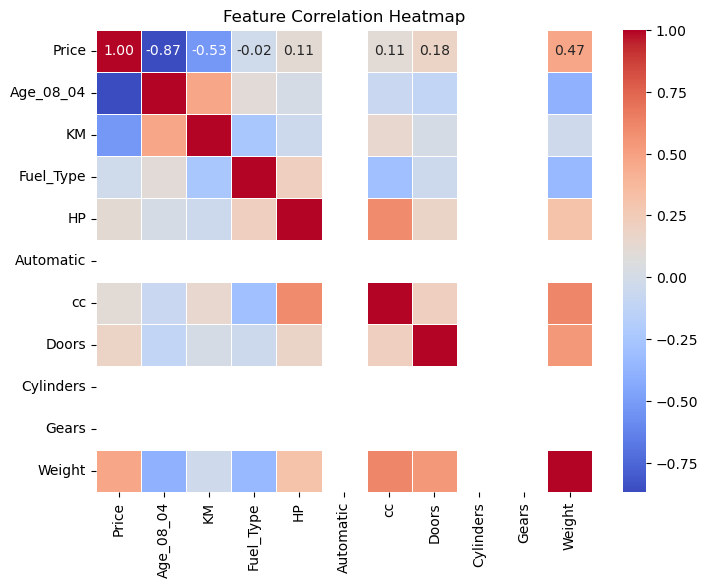

In [298]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

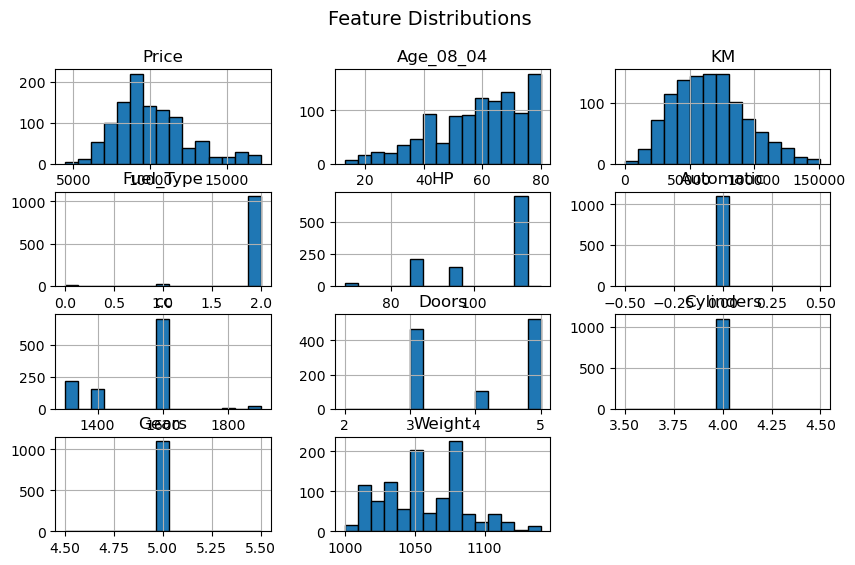

In [299]:
# Histograms of numerical variables
df_cleaned.hist(figsize=(10, 6), bins=15, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


In [300]:
#split the data
target = df_cleaned[['Price']]
target

,Price
9,12950
18,16750
19,16950
20,15950
22,15950
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [301]:
features = df_cleaned.drop('Price', axis = 1)
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,23,71138,1,69,0,1900,3,4,5,1105
18,24,25563,2,110,0,1600,3,4,5,1065
19,30,64359,2,110,0,1600,3,4,5,1105
20,30,67660,2,110,0,1600,3,4,5,1105
22,28,56349,2,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,4,5,1025
1432,72,19000,2,86,0,1300,3,4,5,1015
1433,71,17016,2,86,0,1300,3,4,5,1015
1434,70,16916,2,86,0,1300,3,4,5,1015


In [302]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state = 10 )

In [303]:
from sklearn.linear_model import LinearRegression

In [304]:
lin_reg1 = LinearRegression()

In [305]:
#Train the model
lin_reg1.fit(x_train, y_train)

LinearRegression()

In [306]:
#testing validation
y_predict = lin_reg1.predict(x_test)

In [307]:
mlr_r2 = r2_score(y_test, y_predict)
mlr_r2

0.8060422300957573

In [308]:
mae1 = mean_absolute_error(y_test, y_pred)
mae1

2619.098047725268

In [309]:
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse1

3356.025960958471

In [310]:
# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

# Make predictions
y_pred = ridge_model.predict(x_test)

# Evaluate model
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_mae


789.3075164784325

In [311]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_rmse

1003.9553450600206

In [312]:
ridge_r2 = r2_score(y_test, y_pred)
ridge_r2

0.8060098411558727

In [313]:
# Initialize Feature-Selected MLR Regression model

# Selecting important features based on correlation
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight']  # Modify as needed

# Define X (independent variables) and y (target variable)
features1 = df_cleaned[selected_features]
target1 = df_cleaned['Price']

# Split into training (80%) and test (20%) sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(features1, target1, test_size=0.2, random_state=42)


In [314]:
# Initialize and train MLR model
mlr_model = LinearRegression()
mlr_model.fit(x_train1, y_train1)

# Make predictions
y_pred = mlr_model.predict(x_test1)

# Evaluate model
mae3 = mean_absolute_error(y_test1, y_pred)
mae3


790.7784913270507

In [315]:
rmse3 = np.sqrt(mean_squared_error(y_test1, y_pred))
rmse3

1047.8459543379056

In [316]:
r2 = r2_score(y_test1, y_pred)
r2

0.8123148149384937

In [318]:
# Apply Lasso Regression
lasso_model = Lasso(alpha=1.0)

# Train Lasso
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)

# Evaluate models
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Store results in DataFrame
model_performance = pd.DataFrame({
    "Model": ["Lasso Regression", "Ridge Regression", "Multilinear"],
    "MAE": [lasso_mae, ridge_mae, mae1],
    "RMSE": [lasso_rmse, ridge_rmse, rmse1],
    "R² Score": [lasso_r2, ridge_r2, mlr_r2]
})

model_performance

,Model,MAE,RMSE,R² Score
0,Lasso Regression,789.533138,1004.086033,0.805959
1,Ridge Regression,789.307516,1003.955345,0.806010
2,Multilinear,2619.098048,3356.025961,0.806042
